University of Michigan - ROB 101 Computational Linear Algebra

# Lab 3: Vector and Matrix Multiplication

#### Purpose:  Learn ways to compute a matrix multiplication with programming
- Skills: 
    - Indexing for multiplication
    - Converting algorithm to code
    - Intro to creating your own functions
- Knowledge:
    - Learn how to use built in functions
    - Understand how those functions work behind the scenes

#### Task:  Complete the cells below as directed.
Welcome to the third lab! We will be exploring vector and matrix multiplication in Julia more in-depth here. 

### Matrix Multiplication Reminder
$$[n\times k~~\text{matrix}] \cdot [k \times m~~\text{matrix}] = [n \times m~~\text{matrix}].$$

In other words:  In order for the matrix multiplication A times B to be possible, the number of columns in A must equal the number of rows in B.

\begin{equation}
   A \cdot B:= 
\left[\begin{array}{cccc}  a_1^{\rm row} \cdot b_1^{\rm col} & a_1^{\rm row} \cdot b_2^{\rm col} & \cdots & a_1^{\rm row} \cdot b_m^{\rm col} \\
a_2^{\rm row} \cdot b_1^{\rm col} & a_2^{\rm row} \cdot b_2^{\rm col} & \cdots & a_2^{\rm row} \cdot b_m^{\rm col} \\
\vdots & \vdots & \ddots & \vdots \\
a_n^{\rm row} \cdot b_1^{\rm col} & a_n^{\rm row} \cdot b_2^{\rm col} & \cdots & a_n^{\rm row} \cdot b_m^{\rm col}
\end{array}\right].
\end{equation}

#### Example 1. Resultant Size
There are two rules to consider when multiplying matrices.
1. The number of columns in the first matrix, and rows in the second matrix, must be equal
2. The resultant matrix will have the same number of rows as the first matrix, and the same number of columns as the second matrix.
Take a look:

In [3]:
ex1a = [1 2 3; 4 5 6; 7 8 9]
ex1b = [1 2 3 4 5; 6 7 8 9 10; 11 12 13 14 15]
size(ex1a*ex1b)

(3, 5)

In [4]:
ex2a = [1 2; 3 4]
ex2b = [1 2; 3 4; 5 6]
size(ex2a*ex2b)

LoadError: DimensionMismatch("matrix A has dimensions (2,2), matrix B has dimensions (3,2)")

### Problem 1.  Resultant size
Using your newly-acquired matrix-making skills, create two matrices that multiply together to form a matrix of the specified size.

### a) Create matrix1 and matrix2 that multiply together to form matProduct1a, a 3x4 matrix (3 rows, 4 columns)

In [ ]:
#Use julia matrix multiplication command to compute the resultant matrix from the component matrices
#your answer should be a 3 x 4 matrix. Return that in a variable called matProduct1a

matrix1 = 
matrix2 = 
matProduct1a = matrix1 * matrix2



In [ ]:
# Autograder cell
using LinearAlgebra
### BEGIN HIDDEN TESTS
println("all nothings means likely correct")
TF2 = @assert size(matProduct1a,1) == 3
TF3 = @assert size(matProduct1a,2) == 4
[TF2 TF3]
### END HIDDEN TESTS

### b) [On your own] Create matrix3 and matrix4 that multiply together to form matProduct1b, a 5x2 matrix (5 rows, 2 columns)

In [ ]:
#implement code below that computes answer1b by multiplying together two matrices
#your answer should be a 5 x 2 matrix. Return that in a variable called matProduct1b

matrix3 = 
matrix4 = 
matProduct1b =


In [ ]:
# Autograder cell
### BEGIN HIDDEN TESTS
println("all nothings means likely correct")
TF2 = @assert size(matProduct1b,1) == 5
TF3 = @assert size(matProduct1b,2) == 2
[TF2 TF3]
### END HIDDEN TESTS

### c) Clever indexing + resultant size

You have learned that the ':' operator will pull whole rows/columns from a matrix - a useful tool! If we multiply 2 matrices A and B to create
$C=A*B$ where $A = \begin{bmatrix} 1&2&3\\4&5&6\end{bmatrix}$ and $B = \begin{bmatrix}0&1&1&2\\3&5&8&13\\21&34&55&89\end{bmatrix}$ Extract the first and last rows of C, and the first and last columns of C.

In [ ]:
#multiply A and B
A = [1 2 3; 4 5 6]
B = [0 1 1 2; 3 5 8 13; 21 34 55 89]
C=A*B
#put the indicated columns and rows of C below
topRow = 
botRow = 
leftCol = 
rightCol = 


In [ ]:
# Autograder cell
### BEGIN HIDDEN TESTS
println("all nothings means likely correct")
TF1 = @assert sum(topRow == 659)
TF2 = @assert sum(botRow == 1355)
TF3 = @assert sum(leftCol == 210)
TF4 = @assert sum(rightCol == 902)
[TF1 TF2 TF3 TF4]
### END HIDDEN TESTS

### Problem 2. Rows x Columns Matrix Multiplication
\begin{equation}
   A \cdot B:=  \left[\begin{array}{c}\boxed{a_{11}~~ a_{12}~~ \cdots~~ a_{1k}}  \\
\boxed{a_{21}~~ a_{22}~~ \cdots~~ a_{2k}} \\
\vdots \\
\boxed{a_{n1}~~ a_{n2}~~ \cdots~~ a_{nk}}\end{array}\right] \cdot 
\left[ \boxed{\begin{array}{c} b_{11} \\ b_{21}\\ \vdots \\ b_{k1}\end{array} }~~~
\boxed{\begin{array}{c} b_{12} \\ b_{22}\\ \vdots \\ b_{k2}\end{array} }~~~\cdots~~~
\boxed{\begin{array}{c} b_{1m} \\ b_{2m}\\ \vdots \\ b_{km}\end{array} }\right] =
%
\left[\begin{array}{cccc}  \sum\limits_{i=1}^k a_{1i}b_{i1} & \sum\limits_{i=1}^k a_{1i}b_{i2} & \cdots & \sum\limits_{i=1}^k a_{1i}b_{im} \\
 \sum\limits_{i=1}^k a_{2i}b_{i1} & \sum\limits_{i=1}^k a_{2i}b_{i2} & \cdots & \sum\limits_{i=1}^k a_{2i}b_{im} \\
\vdots & \vdots & \ddots & \vdots \\
 \sum\limits_{i=1}^k a_{ni}b_{i1} & \sum\limits_{i=1}^k a_{ni}b_{i2} & \cdots & \sum\limits_{i=1}^k a_{ni}b_{im} \\
\end{array}\right].
\end{equation}

#### a) Manually calculate $F*G$ where $F = \begin{bmatrix}4&3\\7&9\end{bmatrix}$ and $G = \begin{bmatrix}5\\6\end{bmatrix}$

In [ ]:
#partion F into rows


#partition G into columns (Hint: it is already a column vector)

# compute the product F*G using row x column matrix multiplication for each entry of the matrix and call the answer product2a
product2a = 


In [ ]:
# Autograder cell
### BEGIN HIDDEN TESTS
test1 = sum(product2a)
println("all nothings means likely correct")
TF1 = @assert test1 == 127
TF2 = @assert size(product2a,1) == 2
TF3 = @assert size(product2a,2) == 1
[TF1 TF2 TF3]
### END HIDDEN TESTS

#### b) Calculate $C*D$ where $C = \begin{bmatrix}2&4&6\\3&5&7\end{bmatrix}$ and $D = \begin{bmatrix}9&10\\13&14\\18&19\end{bmatrix}$ using a nested for loop

In [ ]:
C = [2 4 6; 3 5 7]
D = [9 10; 13 14; 18 19]
# Because C is 2 x 3 and D is 3 x 2, their product will be 2 x 2
product2b = zeros(2,2)

#fix the for loop indices
for i in ??:??
    for j in ??:??
        #YOUR CODE HERE
        ### BEGIN SOLUTION

        ### END SOLUTION
    end
end
@show product2b

In [ ]:
# Autograder cell
using LinearAlgebra
### BEGIN HIDDEN TESTS
test2 = sum(product2b)
println("all nothings means likely correct")
TF1 = @assert test2 == 819
TF2 = @assert size(product2b,1) == 2
TF3 = @assert size(product2b,2) == 2
[TF1 TF2 TF3]
### END HIDDEN TESTS

#### c) Your first function!
You just made a nice script for matrix multiplication! But, can we can generalize the script to work for any input by turning it into a *function*. Slot your code from the previous part into the nested for loop below, and you will have made your very first function!

In [ ]:
function matrix_multiply(A,B)
    # We assume for now that the user (you) provides matrices of 
    # the appropriate sizes. We'll see latger how to check for that
    # and throw errors when the user messes up
    rows = size(A,1)
    cols = size(B,2)
    temp = zeros(rows,cols)
    
    #fix the for loop indices based on the last section
    for i = ??:??
        for j = ??:??
            #YOUR CODE HERE
            ### BEGIN SOLUTION

            ### END SOLUTION
        end
    end
    return temp
end

In [5]:
using Random
C=rand(3,40)
D=randn(40,5)
func_ans = matrix_multiply(C,D)
@assert func_ans == C*D

LoadError: UndefVarError: matrix_multiply not defined

### Problem 3.  Matrix Row Reversal
To practice using FOR loops, we will create a function that reverses the order of the rows of a matrix. In other words, the last row becomes the top row, the next to last row becomes the second row, etc.


A function in programming is the same in spirit, if not always in implementation, as its mathematical namesake. A function (generally) takes something in and then (generally) spits something out. 

### Complete the function matrix_reverse that takes in a matrix and then reverses its order, such that the bottom right (last) element becomes the top left (first) element, and the top right element becomes the bottom left element.

In [11]:
#A function, named matrix_reverse, that takes in a matrix A
function matrix_rowReversal(A)
    n,m = size(A)
    temp_mat = zeros(n,m)
    # Fix the indices on the form loop
    for i in ??:??
        ### BEGIN SOLUTION
        temp_mat[i,:] = A[n-i+1,:]
        ### END SOLUTION
    end
    return temp_mat
end

matrix_rowReversal (generic function with 1 method)

In [12]:
#autograder cell
### BEGIN HIDDEN TESTS
println("all nothings means likely correct")
A = [1 2 3; 4 5 6; 7 8 9]
rA = matrix_rowReversal(A)
@show rA
TF1 = @assert rA[2,2] == 5
TF2 = @assert rA[1,3] == 9
TF3 = @assert rA[1,2] == 8
[TF1 TF2 TF3]
### END HIDDEN TESTS

rA = [7.0 8.0 9.0; 4.0 5.0 6.0; 1.0 2.0 3.0]


1×3 Matrix{Nothing}:
 nothing  nothing  nothing

### Problem 4. [On Your Own]  Matrix Row and Column Reversal
To practice using FOR loops, we will create a function that reverses the order of the rows and columns of a matrix. 


A function in programming is the same in spirit, if not always in implementation, as its mathematical namesake. A function (generally) takes something in and then (generally) spits something out. 

### Complete the function matrix_reverse that takes in a matrix and then reverses its order, such that the bottom right (last) element becomes the top left (first) element, and the top right element becomes the bottom left element.

In [1]:
#A function, named matrix_reverse, that takes in a matrix A
function matrix_reverse(A)
    #Your code below: remember, a FOR loop can be inside another FOR loop
    #In that case, for each iteration of the outer FOR loop, the inner
    #   FOR loop will iterate fully
    n,m = size(A)
    temp_mat = zeros(n,m)
    #fix the for loop indices
    for i in ??:??
        #some code?
        for j in ??:??
            #some code?
            ### BEGIN SOLUTION
            temp_mat[i,j] = A[n-i+1,m-j+1]
            ### END SOLUTION
        end
    end
    return temp_mat
end

matrix_reverse (generic function with 1 method)

In [2]:
#autograder cell
### BEGIN HIDDEN TESTS
A = [1 2 3; 4 5 6; 7 8 9]
rA = matrix_reverse(A)
TF1 = @assert rA[1,1] == 9
TF2 = @assert rA[3,3] == 1
TF3 = @assert rA[1,3] == 7
TF4 = @assert rA[3,1] == 3
[TF1 TF2 TF3 TF4]
### END HIDDEN TESTS

1×4 Matrix{Nothing}:
 nothing  nothing  nothing  nothing

<img align="left" src="https://c.tenor.com/TSfv9OumbmsAAAAC/boueibu-yumoto-hakone.gif"/>

# Lorenz Attractor

┌ Info: Saved animation to 
│   fn = /home/jovyan/tmp.gif
└ @ Plots /opt/julia/packages/Plots/Di0Qb/src/animation.jl:114


Plots.AnimatedGif("/home/jovyan/tmp.gif")
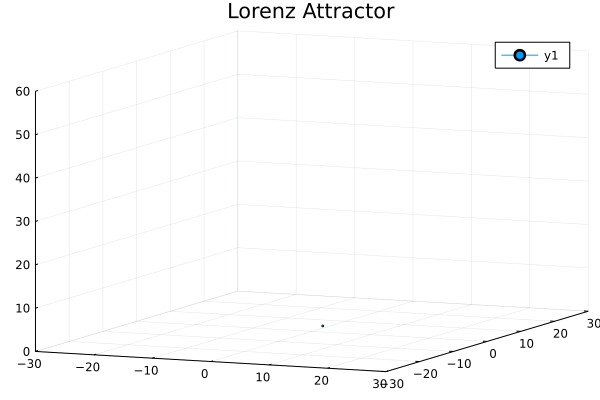

In [7]:
using Plots
gr()
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:3000
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10
